In [7]:
#------------------------------Import library------------------------------
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns
import argparse
from argparse import RawTextHelpFormatter
import os

import warnings
warnings.filterwarnings("ignore")

start = time.process_time()

In [8]:
current_time = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

In [9]:
df = pd.read_csv('data_king_visualization/resultKINGwithcommandrelated/outcleanmergeall2vcfinexp2rmpalinrmsam.kin',
                 sep='\t')
df = df.drop(columns=['N_SNP', 'Z0', 'Phi', 'HetHet', 'IBS0', 'Error'])
df = df.rename(columns={"FID":"FID1"})
df.insert(2, "FID2", df['FID1'].to_list())
df

,FID1,ID1,FID2,ID2,HetConc,HomIBS0,Kinship,IBD1Seg,IBD2Seg,PropIBD,InfType
0,CH,CH01,CH,CH02,0.2405,0.3942,0.0040,0.0135,0.0,0.0068,UN
1,CH,CH01,CH,CH03,0.2419,0.3919,0.0080,0.0184,0.0,0.0092,UN
2,CH,CH01,CH,CH04,0.2281,0.4195,-0.0311,0.0034,0.0,0.0017,UN
3,CH,CH01,CH,CH05,0.2385,0.4208,-0.0291,0.0040,0.0,0.0020,UN
4,CH,CH01,CH,CH20,0.2317,0.4193,-0.0285,0.0156,0.0,0.0078,UN
...,...,...,...,...,...,...,...,...,...,...,...
171,US,US24,US,US26,0.2596,0.3918,0.0718,0.2157,0.0,0.1078,3rd
172,US,US24,US,US27,0.2166,0.5300,-0.0334,0.0055,0.0,0.0027,UN
173,US,US25,US,US26,0.2587,0.3777,0.0773,0.2882,0.0,0.1441,3rd
174,US,US25,US,US27,0.2153,0.5335,-0.0352,0.0000,0.0,0.0000,UN


In [10]:
# df = pd.read_csv('/Users/lilti/Documents/GitHub/NSTDA/KING_Visualization/data_king_visualization/resultKINGwithcommandrelated/outcleanmergeall2vcfinexp2rmpalinrmsam.kin',
#                  sep='\t')

# for i in ["N_SNP","Z0","Phi","HetHet","IBS0","HetConc","HomIBS0","Kinship","IBD1Seg","IBD2Seg","PropIBD","Error"]:
for i in ["Kinship"]:
    df[i] = df[i].astype(float)
df

,FID1,ID1,FID2,ID2,HetConc,HomIBS0,Kinship,IBD1Seg,IBD2Seg,PropIBD,InfType
0,CH,CH01,CH,CH02,0.2405,0.3942,0.0040,0.0135,0.0,0.0068,UN
1,CH,CH01,CH,CH03,0.2419,0.3919,0.0080,0.0184,0.0,0.0092,UN
2,CH,CH01,CH,CH04,0.2281,0.4195,-0.0311,0.0034,0.0,0.0017,UN
3,CH,CH01,CH,CH05,0.2385,0.4208,-0.0291,0.0040,0.0,0.0020,UN
4,CH,CH01,CH,CH20,0.2317,0.4193,-0.0285,0.0156,0.0,0.0078,UN
...,...,...,...,...,...,...,...,...,...,...,...
171,US,US24,US,US26,0.2596,0.3918,0.0718,0.2157,0.0,0.1078,3rd
172,US,US24,US,US27,0.2166,0.5300,-0.0334,0.0055,0.0,0.0027,UN
173,US,US25,US,US26,0.2587,0.3777,0.0773,0.2882,0.0,0.1441,3rd
174,US,US25,US,US27,0.2153,0.5335,-0.0352,0.0000,0.0,0.0000,UN


In [11]:
#------------------------------------------------ Find Potential Relationship ----------------------------------------
name_list = list(np.unique(df['ID1'].to_list() + df['ID2'].to_list()))

In [12]:
heat_df = pd.DataFrame(data=[[0.0000 for i in range(len(name_list))] for j in range(len(name_list))],
                       index=name_list,
                       columns=name_list)

multiply = 10000

for i in range(len(df)):
    if df['Kinship'][i] >= 0:
        heat_df[df['ID1'][i]][df['ID2'][i]] = df['Kinship'][i]*multiply 
        heat_df[df['ID2'][i]][df['ID1'][i]] = df['Kinship'][i]*multiply 
    else:
        heat_df[df['ID1'][i]][df['ID2'][i]] = 0
        heat_df[df['ID2'][i]][df['ID1'][i]] = 0
    
    if ((heat_df[df['ID1'][i]][df['ID2'][i]] == 0.0884*multiply) or 
        (heat_df[df['ID1'][i]][df['ID2'][i]] == 0.177*multiply) or 
        (heat_df[df['ID1'][i]][df['ID2'][i]] == 0.354*multiply)):
        heat_df[df['ID1'][i]][df['ID2'][i]] == heat_df[df['ID1'][i]][df['ID2'][i]] - 0.000001
        
heat_df

,CH01,CH02,CH03,CH04,CH05,CH20,TH28,TH29,TH30,TH31,...,UK16,UK17,UK18,UK19,US22,US23,US24,US25,US26,US27
CH01,0.0,40.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH02,40.0,0.0,4958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH03,80.0,4958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH04,0.0,0.0,0.0,0.0,253.0,158.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH05,0.0,0.0,0.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH20,0.0,0.0,0.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TH28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1902.0,3158.0,1715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TH29,0.0,0.0,0.0,0.0,0.0,0.0,1902.0,0.0,2673.0,2719.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TH30,0.0,0.0,0.0,0.0,0.0,0.0,3158.0,2673.0,0.0,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TH31,0.0,0.0,0.0,0.0,0.0,0.0,1715.0,2719.0,3016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


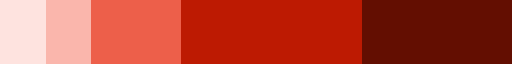

In [13]:
#------------------------ Create cmap ------------------------
newcolors = plt.get_cmap('viridis',5000).colors

# Define integer indices based on fractions of 5000 colors
idx_duplicate = int(0.354 *multiply)  # 1/(2**(3/2))
idx_first_degree = int(0.177 *multiply)  # 1/(2**(5/2))
idx_second_degree = int(0.0884 *multiply)  # 1/(2**(7/2))
idx_third_degree = int(0.0442 *multiply)  # 1/(2**(9/2))

# Set color ranges based on relationship degree
newcolors[idx_duplicate:, :] = colors.to_rgba('#630e01')       # Duplicate
newcolors[idx_first_degree:idx_duplicate, :] = colors.to_rgba('#bd1a02')  # First degree
newcolors[idx_second_degree:idx_first_degree, :] = colors.to_rgba('#ed5f4a')  # Second degree
newcolors[idx_third_degree:idx_second_degree, :] = colors.to_rgba('#fab6ac')  # Third degree
newcolors[:idx_third_degree, :] = colors.to_rgba('#fee3df')   # Unrelated

# create the customized color map
mycmap = colors.ListedColormap(newcolors)
mycmap

In [14]:
tick_middle_points = [0,
                      (0 + idx_third_degree) / 2,               # Middle of "unrelated"
                      idx_third_degree,
                      (idx_third_degree + idx_second_degree) / 2,  # Middle of "Third degree"
                      idx_second_degree,
                      (idx_second_degree + idx_first_degree) / 2,  # Middle of "Second degree"
                      idx_first_degree,
                      (idx_first_degree + idx_duplicate) / 2,       # Middle of "First degree"
                      idx_duplicate,
                      (idx_duplicate + 5000) / 2,                  # Middle of "Duplicate"
                      5000
                      ]
tick_middle_points

[0, 221.0, 442, 663.0, 884, 1327.0, 1770, 2655.0, 3540, 4270.0, 5000]

In [15]:
tick_labels = [0, 
               'unrelated', 
               round(idx_third_degree / multiply * 100, 4), 
               'Third degree', 
               round(idx_second_degree / multiply * 100, 4),
               'Second degree',
               round(idx_first_degree / multiply * 100, 4),
               'First degree', 
               round(idx_duplicate / multiply * 100, 4),
               'Duplicate',
               0.5 * 100]

In [16]:
formatted_text = []
for i in range(len(heat_df)):
    formatted_text.append((heat_df.iloc[i] / multiply * 100).to_list())

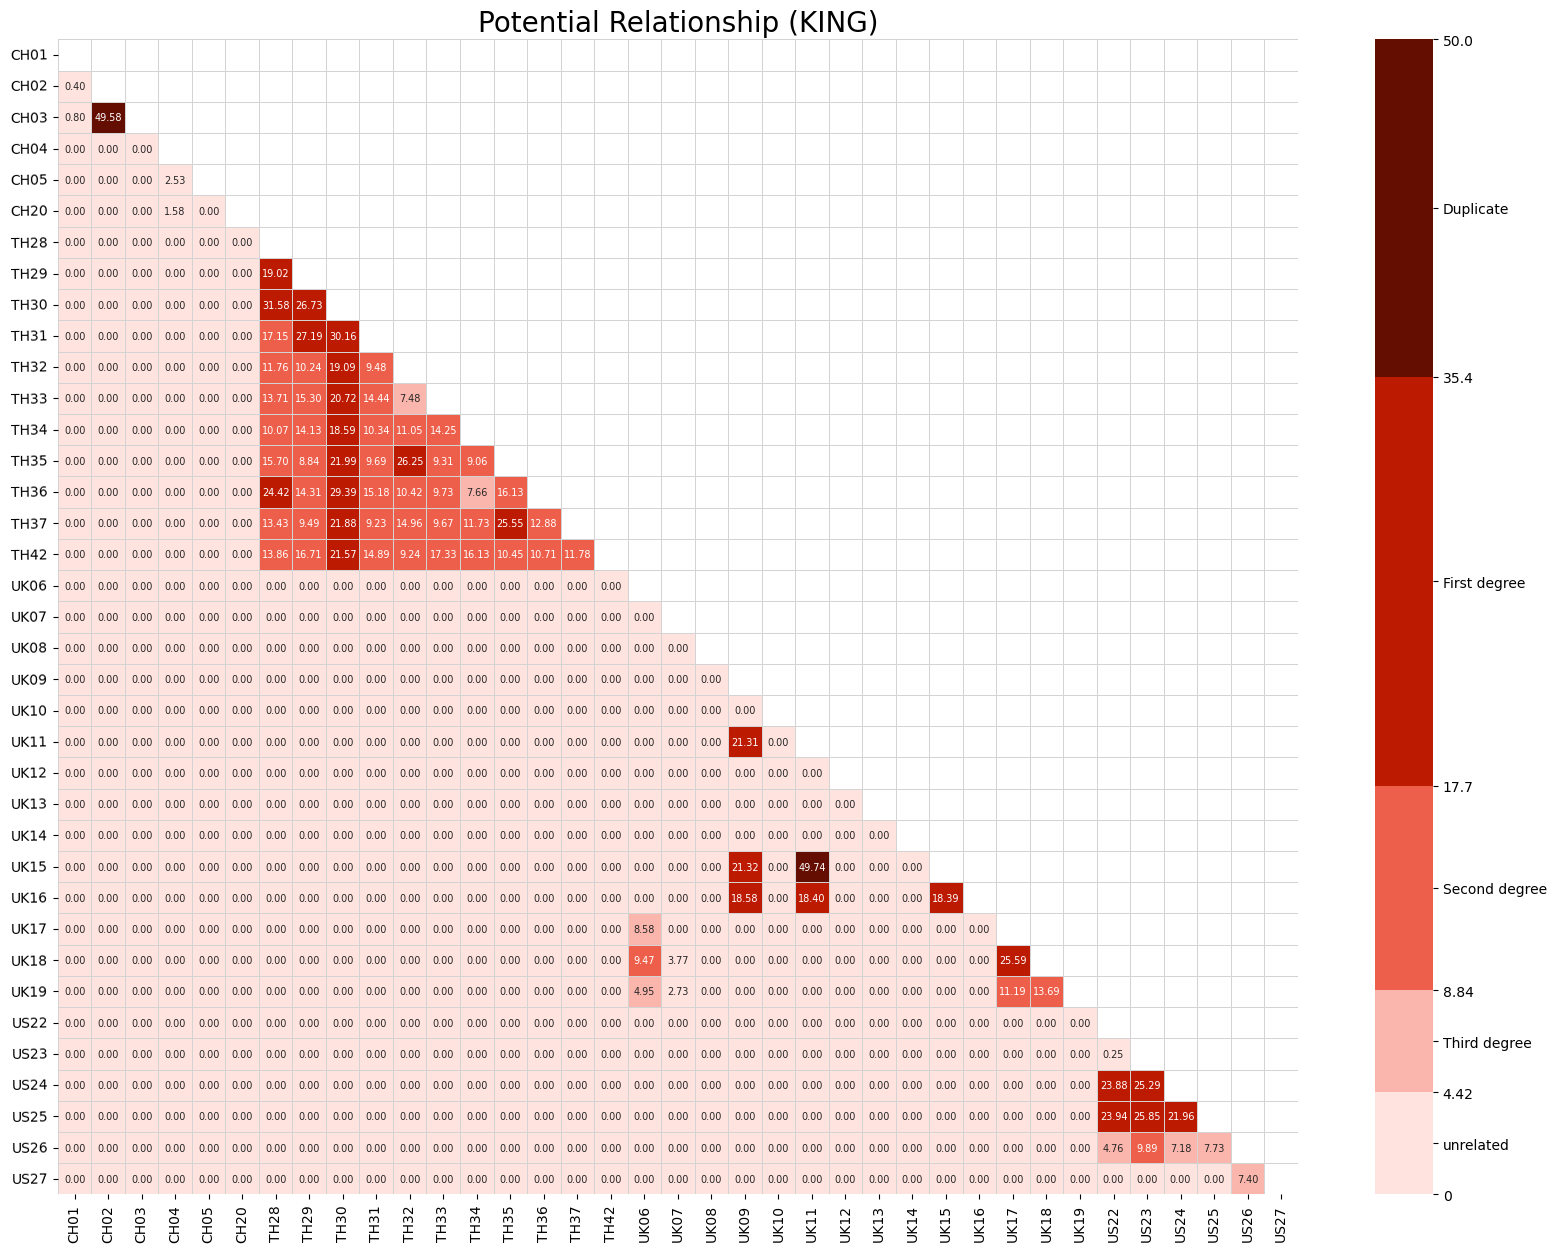

In [17]:
#------------------------ Plot Heatmap ------------------------
mask = np.zeros_like(heat_df)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(
    data=heat_df,
    ax=ax,
    vmax=5000, 
    vmin=0,
    cmap=mycmap,
    linewidths=.5, 
    linecolor='lightgray',
    annot=formatted_text,
    fmt=".2f",
    mask=mask,
    # annot_kws={"fontsize": args.size} 
    annot_kws={"fontsize": 7} 
)

cbar = ax.collections[0].colorbar
cbar.set_ticks(tick_middle_points)  # Set the ticks to the middle points
cbar.set_ticklabels(tick_labels) 

plt.title('Potential Relationship (KING)', fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=1)
# plt.savefig(f'result_{current_time}/Heatmap_{current_time}.png', dpi=200)
plt.show()